# USING OOPS

In [ ]:
X= [[1,2,3,2.5],
    [2,5,-1,2],
     [-1.5,2.7,3.3,-0.8]]

In [ ]:
import random
np.random.seed(0)

class DenseLayer():
  def __init__(self, n_inputs, n_neurons):
    self.weights = 0.1*np.random.randn(n_inputs, n_neurons) # Taking inputs x neurons so that we dont have to transpose. Multiplying with 0.1 so we stay in range -1 and 1
    self.biases = np.zeros((1,n_neurons))
  def forwardpass(self, input):
    self.output=np.dot(input, self.weights) + self.biases


layer1= DenseLayer(4,5) #input = 4, Output (neurons in layer) = 5
layer1.forwardpass(X)
print("Layer 1:\n ", layer1.output)
# layer 1 output is input for layer 2
print("\n")
layer2=DenseLayer(5,2) #input = 5 (output of previous), output = 2 (neurons)
layer2.forwardpass(layer1.output)
print("Layer 2:\n ",layer2.output)

Layer 1:
  [[ 0.10758131  1.03983522  0.24462411  0.31821498  0.18851053]
 [-0.08349796  0.70846411  0.00293357  0.44701525  0.36360538]
 [-0.50763245  0.55688422  0.07987797 -0.34889573  0.04553042]]


Layer 2:
  [[ 0.148296   -0.08397602]
 [ 0.14100315 -0.01340469]
 [ 0.20124979 -0.07290616]]


In [ ]:
import numpy as np

In [ ]:
%pip install nnfs

In [ ]:
import nnfs
nnfs.init()

In [ ]:
def gen_data(points, classes):
    X = np.zeros((points*classes, 2))
    y = np.zeros(points*classes, dtype='uint8')
    for class_number in range(classes):
        ix = range(points*class_number, points*(class_number+1))
        r = np.linspace(0.0, 1, points)  # radius
        t = np.linspace(class_number*4, (class_number+1)*4, points) + np.random.randn(points)*0.2
        X[ix] = np.c_[r*np.sin(t*2.5), r*np.cos(t*2.5)]
        y[ix] = class_number
    return X, y

In [ ]:
X,y = gen_data(100,3)

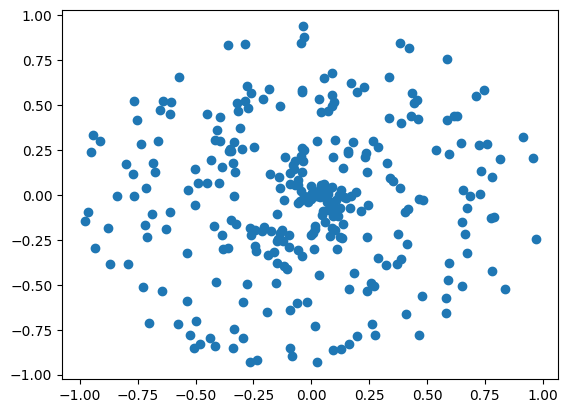

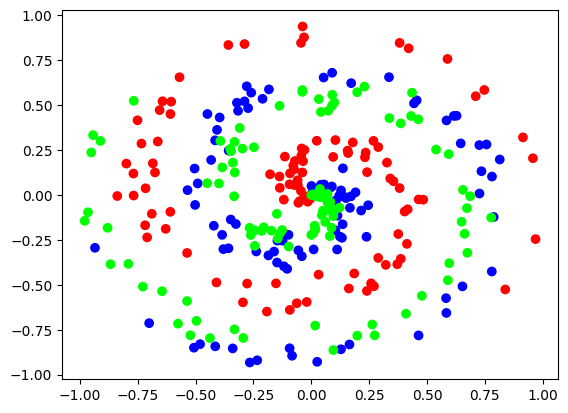

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1])
plt.show()

plt.scatter(X[:,0], X[:,1], c=y, cmap='brg')
plt.show()

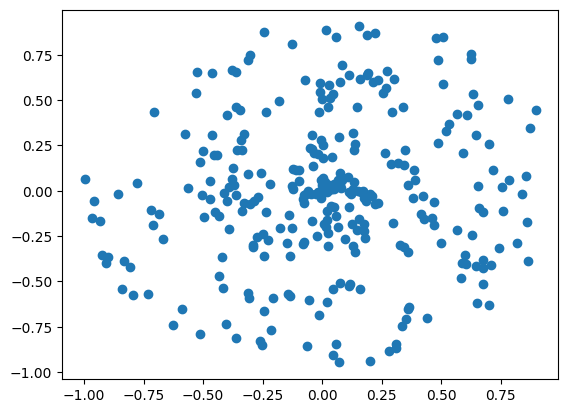

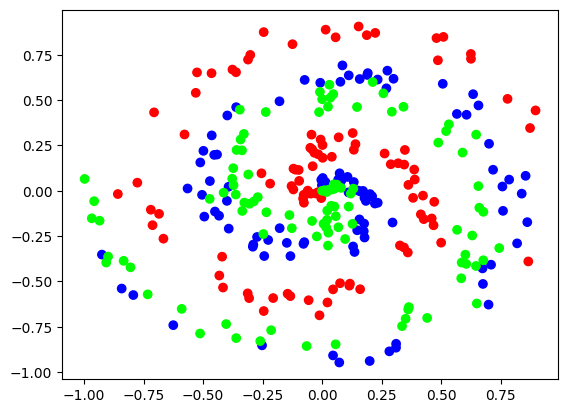

In [ ]:
from nnfs.datasets import spiral_data

X,y = spiral_data(100,3)


plt.scatter(X[:,0], X[:,1])
plt.show()

plt.scatter(X[:,0], X[:,1], c=y, cmap='brg')
plt.show()

# Activation Rectifier Linear Unit

In [ ]:
class ActivationRELU:
  def forward_pass(self, input):
    self.output=np.maximum(0, input)


# Dense Layer

In [ ]:
class DenseLayer():
  def __init__(self, n_inputs, n_neurons):
    self.weights = 0.1*np.random.randn(n_inputs, n_neurons) # Taking inputs x neurons so that we dont have to transpose. Multiplying with 0.1 so we stay in range -1 and 1
    self.biases = np.zeros((1,n_neurons))
  def forward_pass(self, input):
    self.output=np.dot(input, self.weights) + self.biases


In [ ]:
Layer1=DenseLayer(2,5)
Activation1=ActivationRELU()
Layer1.forward_pass(X)
Activation1.forward_pass(Layer1.output)


# Softmax Activation function

In [ ]:
class Activation_SoftMax:
  def forward_pass(self, input):
    exp_values=np.exp(input - np.max(input, axis=1, keepdims=True))
    norm_values=exp_values/np.sum(exp_values, axis=1, keepdims=True)
    self.output=norm_values

In [ ]:
X, y = spiral_data(100,3)

layer1 = DenseLayer(2,3)
activation1 = ActivationRELU()

layer2 = DenseLayer(3,3)
activation2 = Activation_SoftMax()

layer1.forward_pass(X)
activation1.forward_pass(layer1.output)

layer2.forward_pass(activation1.output)
activation2.forward_pass(layer2.output)

print(activation2.output[:5])

[[0.33333334 0.33333334 0.33333334]
 [0.333341   0.33333027 0.33332872]
 [0.33340576 0.33330435 0.33328986]
 [0.33344728 0.33328775 0.33326495]
 [0.3334685  0.33327928 0.33325225]]


In [ ]:
class Loss:
  def calculate(self, output, y):
    sample_losses = self.forward(output, y) #function which gives loss (categorical cross entropy), -log(y_confi)
    data_loss =  np.mean(sample_losses)
    return data_loss

class Loss_CategoricalCrossEntropy(Loss):
  def forward(self, y_pred, y_true):
    samples = len(y_pred)
    y_pred_clipped = np.clip(y_pred, 1e-7, 1-1e-7)

    if len(y_true.shape) == 1:
      # [0, 1, 1]      if given indexes
      correct_confidences = y_pred_clipped[range(samples), y_true]
    elif len(y_true.shape) == 2:
      # [[1,0,0],[0,1,0],[0,1,0]]    if given hot one encoded matrix
      correct_confidences = np.sum(y_pred_clipped*y_true, axis=1)

    negative_log_likelihoods = -np.log(correct_confidences)
    return negative_log_likelihoods


    def backward(self, dvalues, y_true):
        samples = len(dvalues)
        labels = len(dvalues[0])


        if len(y_true.shape) == 1:
            y_true = np.eye(labels)[y_true] # hot one encoding

        self.dinputs = -y_true / dvalues
        self.dinputs = self.dinputs / samples

In [ ]:
loss_function = Loss_CategoricalCrossEntropy()
loss = loss_function.calculate(activation2.output, y)
print("Loss: ", loss)

Loss:  1.0980458


In [ ]:
predictions = np.argmax(activation2.output, axis=1)
if len(y.shape)==2:
  y=np.argmax(y, axis=1)

accuracy = np.mean(predictions == y)

print(accuracy)

0.36333333333333334


In [ ]:
class Activation_Softmax_Loss_CategoricalCrossentropy:
    def __init__(self):
        self.activation = Activation_SoftMax()
        self.loss = Loss_CategoricalCrossEntropy()

    def forward(self, inputs, y_true):

        self.activation.forward(inputs)
        self.output = self.activation.output

        return self.loss.calculate(self.output, y_true)

    def backward(self, dvalues, y_true):
        samples = len(dvalues)

        if len(y_true.shape) == 2: # hot eye encoded
            y_true = np.argmax(y_true, axis=1) # 0-index representation

        self.dinputs = dvalues.copy() #because safe to create a copy

        self.dinputs[range(samples), y_true] -= 1 # for sample=3, range 0,1,2 , if y_true = [0,1,1] then dinputs substraction at {0,0},{1,1},{2,1}

        self.dinputs = self.dinputs / samples #normalized to avoid shoot up


In [ ]:
softmax_outputs = np.array([[0.7, 0.1, 0.2],
 [0.1, 0.5, 0.4],
 [0.02, 0.9, 0.08]])
class_targets = np.array([0, 1, 1])
softmax_loss = Activation_Softmax_Loss_CategoricalCrossentropy()
softmax_loss.backward(softmax_outputs, class_targets)
dvalues1 = softmax_loss.dinputs

print(dvalues1)

[[-0.1         0.03333333  0.06666667]
 [ 0.03333333 -0.16666667  0.13333333]
 [ 0.00666667 -0.03333333  0.02666667]]


# Compiling ALL:

Layer

In [ ]:
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.01*np.random.randn(n_inputs, n_neurons) # multiplied by 0.01 to not overshoot the limit of 1
        self.biases = np.zeros((1, n_neurons)) #initialized by zeros

    def forward(self, inputs):
        self.inputs = inputs
        self.output = np.dot(inputs, self.weights) + self.biases #y= x.w + b

    def backward(self, dvalues):
        self.dweights = np.dot(self.inputs.T, dvalues) # x tranpose . dL/dz = dL/dw = (dL/dz).(dz/dw)
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True) # dL/dz.dz/db => dL/dz  (because dz/db = 1)
        self.dinputs = np.dot(dvalues, self.weights.T) # dL/dz . w transpose = dL/dx = (dL/dz).(dz/dx)


RELU

In [ ]:
class Activation_ReLU:
    def forward(self, inputs):
        self.inputs = inputs
        self.output = np.maximum(0, inputs)

    def backward(self, dvalues):
        self.dinputs = dvalues.copy() #so that original don't get modified
        self.dinputs[self.inputs <= 0] = 0 # equals zero if input(z) <= 0 else dL/dz because RELU returns input as it is if > 0


Individual softMax function, but backward pass won't be using this as combining softmax and categorical loss is easier

In [ ]:
class Activation_Softmax:
      def forward(self, inputs):
        exp_values = np.exp(inputs-np.max(inputs, axis=1, keepdims=True)) #substracted because still gives the same answer and avoids overshoot
        probabilities = exp_values/np.sum(exp_values, axis=1,keepdims=True) #normalized
        self.output = probabilities

In [ ]:
class Loss:
      def calculate(self, output, y):
        sample_losses = self.forward(output, y)
        data_loss = np.mean(sample_losses)
        return data_loss

In [ ]:
class Loss_CategoricalCrossEntropy(Loss):
  def forward(self, y_pred, y_true):
    samples = len(y_pred)
    y_pred_clipped = np.clip(y_pred, 1e-7, 1-1e-7) #avoiding absolute zero and one y_pred because that can lead to infinite/undefinite loss

    if len(y_true.shape) == 1:
      # [0, 1, 1]      if given indexes
      correct_confidences = y_pred_clipped[range(samples), y_true]
    elif len(y_true.shape) == 2:
      # [[1,0,0],[0,1,0],[0,1,0]]    if given hot one encoded matrix
      correct_confidences = np.sum(y_pred_clipped*y_true, axis=1)

    negative_log_likelihoods = -np.log(correct_confidences) #for correct class: L = -1*log(y)
    return negative_log_likelihoods


    def backward(self, dvalues, y_true):
        samples = len(dvalues)
        labels = len(dvalues[0])

        if len(y_true.shape) == 1:
            y_true = np.eye(labels)[y_true] # converted to hot one encoding

        self.dinputs = -y_true / dvalues #derivative of loss
        self.dinputs = self.dinputs / samples # normalized

Combined Softmax and Categorical Loss Entropy Loss, for backward pass

In [ ]:
class Activation_Softmax_Loss_CategoricalCrossentropy:
    def __init__(self):
        self.activation = Activation_Softmax()
        self.loss = Loss_CategoricalCrossEntropy()

    def forward(self, inputs, y_true):
        self.activation.forward(inputs)
        self.output = self.activation.output # gives output
        return self.loss.calculate(self.output, y_true) # already explained in Activation_Softmax, gives LOSS


    def backward(self, y_pred, y_true):
        samples = len(y_pred)
        if len(y_true.shape) == 2:
            y_true = np.argmax(y_true, axis=1) #converting to 0 based indexing again
        self.dinputs = y_pred.copy() # ASSIGINING y_pred to input
        self.dinputs[range(samples), y_true] -= 1  # derivative = y_pred - y_true = y_pred - 1 (for correct class)
        self.dinputs = self.dinputs / samples  # normalized

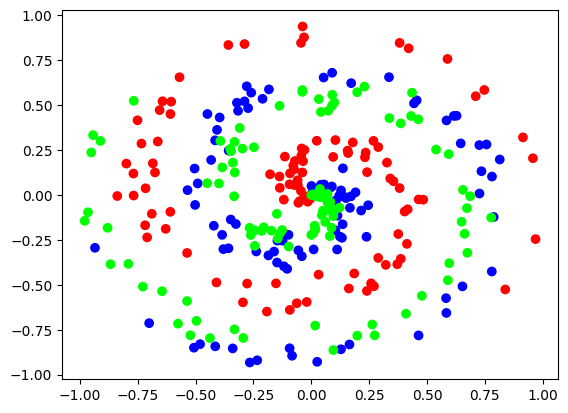

In [ ]:
from nnfs.datasets import spiral_data
import numpy as np
import nnfs
nnfs.init()
import matplotlib.pyplot as plt
X, y = spiral_data(samples=100, classes=3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='brg')
plt.show()

In [ ]:
#DATA
X, y = spiral_data(samples=100, classes=3)

#DENSE LAYER
dense1 = Layer_Dense(2, 3)
activation1 = Activation_ReLU()

dense2 = Layer_Dense(3, 3)
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()

#FORWARD PASS: Layer 1 -> activation 1-> Layer 2 -> softmax activation (2)
dense1.forward(X)
activation1.forward(dense1.output)
dense2.forward(activation1.output)
loss = loss_activation.forward(dense2.output, y)

print("RESULT:\n", loss_activation.output[:5])
print("\n")
print('LOSS:', loss)

predictions = np.argmax(loss_activation.output, axis=1)
# print("Predictions: ", predictions)
if len(y.shape) == 2:
  y = np.argmax(y, axis=1)

accuracy = np.mean(predictions == y)
print("\n")
print('ACCURACY:', accuracy)

# Backward pass
loss_activation.backward(loss_activation.output, y) #Softmax+Loss output to Dense 2 output
dense2.backward(loss_activation.dinputs) #Dense 2 output to Dense 2 input
activation1.backward(dense2.dinputs) #Dense2 input/Activation1 output to activation1 input
dense1.backward(activation1.dinputs) #Activation 1 input/Dense1 output to Dense 1 input (data basically)

#Gradients
print()
print("Grads: ")
print("wrt weights of 1")
print(dense1.dweights)
print("wrt biases of 1")
print(dense1.dbiases)
print("wrt weights of 2")
print(dense2.dweights)
print("wrt biases of 1")
print(dense2.dbiases)

RESULT:
 [[0.33333334 0.33333334 0.33333334]
 [0.33333334 0.33333334 0.33333334]
 [0.33333334 0.3333333  0.33333334]
 [0.3333335  0.333333   0.33333352]
 [0.33333334 0.33333334 0.33333334]]


LOSS: 1.0986118


ACCURACY: 0.33666666666666667

Grads: 
wrt weights of 1
[[ 7.7209341e-05 -1.0590541e-04 -8.3512561e-05]
 [ 2.8525142e-04  6.1521474e-05 -9.9994701e-05]]
wrt biases of 1
[[ 0.00036935 -0.00025332  0.00021116]]
wrt weights of 2
[[ 1.0425548e-04  1.5916037e-05 -1.2017150e-04]
 [-4.9149978e-05  1.9419583e-04 -1.4504585e-04]
 [ 3.6147623e-05  1.0825427e-04 -1.4440189e-04]]
wrt biases of 1
[[ 1.0384247e-05 -1.0518939e-05  3.9814040e-08]]


# SGD (without momentum)

In [ ]:
class Optimizer_SGD:
  def __init__(self, alpha=0.5):
    self.alpha = alpha # learning rate
  def update_params(self, layer):
    layer.weights += -self.alpha*layer.dweights
    layer.biases += -self.alpha*layer.dbiases

In [ ]:
X, y = spiral_data(samples=100, classes=3)

dense1 = Layer_Dense(2, 64)
activation1 = Activation_ReLU()
dense2 = Layer_Dense(64, 3)
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()
optimizer = Optimizer_SGD()

for epoch in range(10001):
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    loss = loss_activation.forward(dense2.output, y)
    predictions = np.argmax(loss_activation.output, axis=1)
    if len(y.shape) == 2:
        y = np.argmax(y, axis=1)
    accuracy = np.mean(predictions == y)

    if not epoch % 1000:
        print(f'epoch: {epoch}, ' + f'acc: {accuracy:.3f}, ' + f'loss: {loss:.3f}')

    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    #optimizing
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)


epoch: 0, acc: 0.337, loss: 1.099
epoch: 1000, acc: 0.410, loss: 1.070
epoch: 2000, acc: 0.407, loss: 1.051
epoch: 3000, acc: 0.470, loss: 1.014
epoch: 4000, acc: 0.450, loss: 0.958
epoch: 5000, acc: 0.460, loss: 0.881
epoch: 6000, acc: 0.490, loss: 0.858
epoch: 7000, acc: 0.517, loss: 0.831
epoch: 8000, acc: 0.550, loss: 0.815
epoch: 9000, acc: 0.580, loss: 0.770
epoch: 10000, acc: 0.607, loss: 0.797


# SGD with decaying learning rate

In [ ]:
class Optimizer_SGD:
    def __init__(self, learning_rate=1., decay=0.):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0

    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * (1. / (1. + self.decay * self.iterations))

    def update_params(self, layer):
        layer.weights += -self.current_learning_rate * layer.dweights
        layer.biases += -self.current_learning_rate * layer.dbiases

    def post_update_params(self):
        self.iterations += 1


In [ ]:
import numpy as np
X, y = spiral_data(samples=100, classes=3)

dense1 = Layer_Dense(2, 64)
activation1 = Activation_ReLU()
dense2 = Layer_Dense(64, 3)

loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()

optimizer = Optimizer_SGD(decay=1e-3)

for epoch in range(10001):
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    loss = loss_activation.forward(dense2.output, y)

    predictions = np.argmax(loss_activation.output, axis=1)
    if len(y.shape) == 2:
        y = np.argmax(y, axis=1)
    accuracy = np.mean(predictions == y)

    if not epoch % 1000:
        print(f'epoch: {epoch}, ' + f'acc: {accuracy:.3f}, ' + f'loss: {loss:.3f}, ' + f'alpha: {optimizer.current_learning_rate}')

    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    #optimizing
    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()


epoch: 0, acc: 0.310, loss: 1.099, alpha: 1.0
epoch: 1000, acc: 0.423, loss: 1.062, alpha: 0.5002501250625312
epoch: 2000, acc: 0.503, loss: 0.983, alpha: 0.33344448149383127
epoch: 3000, acc: 0.560, loss: 0.899, alpha: 0.25006251562890724
epoch: 4000, acc: 0.573, loss: 0.869, alpha: 0.2000400080016003
epoch: 5000, acc: 0.613, loss: 0.822, alpha: 0.16669444907484582
epoch: 6000, acc: 0.653, loss: 0.767, alpha: 0.1428775539362766
epoch: 7000, acc: 0.707, loss: 0.715, alpha: 0.12501562695336915
epoch: 8000, acc: 0.737, loss: 0.668, alpha: 0.11112345816201799
epoch: 9000, acc: 0.753, loss: 0.625, alpha: 0.1000100010001
epoch: 10000, acc: 0.773, loss: 0.592, alpha: 0.09091735612328393


# SGD with momentum and decaying learning rate

In [ ]:
import numpy as np

class Optimizer_SGD:
    def __init__(self, learning_rate=1., decay=0., momentum=0.):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.momentum = momentum

    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * (1. / (1. + self.decay * self.iterations))

    def update_params(self, layer):
        if self.momentum:
            if not hasattr(layer, 'weight_momentums'):
                layer.weight_momentums = np.zeros_like(layer.weights)
                layer.bias_momentums = np.zeros_like(layer.biases)

            #weight
            weight_updates = self.momentum * layer.weight_momentums - self.current_learning_rate * layer.dweights
            layer.weight_momentums = weight_updates

            #Bias
            bias_updates = self.momentum * layer.bias_momentums - self.current_learning_rate * layer.dbiases
            layer.bias_momentums = bias_updates

        else:
            weight_updates = -self.current_learning_rate * layer.dweights
            bias_updates = -self.current_learning_rate * layer.dbiases

        layer.weights += weight_updates
        layer.biases += bias_updates

    def post_update_params(self):
        self.iterations += 1


In [ ]:
import numpy as np
X, y = spiral_data(samples=100, classes=3)

dense1 = Layer_Dense(2, 64)
activation1 = Activation_ReLU()
dense2 = Layer_Dense(64, 3)

loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()

optimizer = Optimizer_SGD(decay=1e-3, momentum=0.9)

for epoch in range(10001):
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    loss = loss_activation.forward(dense2.output, y)

    predictions = np.argmax(loss_activation.output, axis=1)
    if len(y.shape) == 2:
        y = np.argmax(y, axis=1)
    accuracy = np.mean(predictions == y)

    if not epoch % 1000:
        print(f'epoch: {epoch}, ' + f'acc: {accuracy:.3f}, ' + f'loss: {loss:.3f}, ' + f'alpha: {optimizer.current_learning_rate}')

    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    #optimizing
    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()


epoch: 0, acc: 0.323, loss: 1.099, alpha: 1.0
epoch: 1000, acc: 0.720, loss: 0.589, alpha: 0.5002501250625312
epoch: 2000, acc: 0.733, loss: 0.550, alpha: 0.33344448149383127
epoch: 3000, acc: 0.733, loss: 0.544, alpha: 0.25006251562890724
epoch: 4000, acc: 0.733, loss: 0.541, alpha: 0.2000400080016003
epoch: 5000, acc: 0.733, loss: 0.540, alpha: 0.16669444907484582
epoch: 6000, acc: 0.733, loss: 0.539, alpha: 0.1428775539362766
epoch: 7000, acc: 0.733, loss: 0.538, alpha: 0.12501562695336915
epoch: 8000, acc: 0.733, loss: 0.536, alpha: 0.11112345816201799
epoch: 9000, acc: 0.733, loss: 0.534, alpha: 0.1000100010001
epoch: 10000, acc: 0.733, loss: 0.534, alpha: 0.09091735612328393


# Adagrad optimizer
## w = w- α.(dL/dw)/sqrt(cache+ϵ)

where epsilon is summation ∑ω^2 from t=0 to t=t


In [ ]:
import numpy as np

class Optimizer_Adagrad:
    def __init__(self, learning_rate=1., decay=0., epsilon=1e-7):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.epsilon = epsilon

    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * (1./(1. + self.decay*self.iterations))
    def update_params(self, layer):
        if not hasattr(layer, 'weight_cache'):
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_cache = np.zeros_like(layer.biases)

        layer.weight_cache += layer.dweights**2
        layer.bias_cache += layer.dbiases**2

        layer.weights += -self.current_learning_rate * layer.dweights/(np.sqrt(layer.weight_cache)+self.epsilon)
        layer.biases += -self.current_learning_rate * layer.dbiases/(np.sqrt(layer.bias_cache)+self.epsilon)

    def post_update_params(self):
        self.iterations += 1


In [ ]:
import numpy as np
X, y = spiral_data(samples=100, classes=3)

dense1 = Layer_Dense(2, 64)
activation1 = Activation_ReLU()
dense2 = Layer_Dense(64, 3)

loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()

optimizer = Optimizer_Adagrad(decay=1e-4)

for epoch in range(10001):
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    loss = loss_activation.forward(dense2.output, y)

    predictions = np.argmax(loss_activation.output, axis=1)
    if len(y.shape) == 2:
        y = np.argmax(y, axis=1)
    accuracy = np.mean(predictions == y)

    if not epoch % 1000:
        print(f'epoch: {epoch}, ' + f'acc: {accuracy:.3f}, ' + f'loss: {loss:.3f}, ' + f'alpha: {optimizer.current_learning_rate}')

    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    #optimizing
    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()


epoch: 0, acc: 0.287, loss: 1.099, alpha: 1.0
epoch: 1000, acc: 0.577, loss: 0.796, alpha: 0.9091735612328392
epoch: 2000, acc: 0.653, loss: 0.726, alpha: 0.8334027835652972
epoch: 3000, acc: 0.743, loss: 0.613, alpha: 0.7692899453804138
epoch: 4000, acc: 0.750, loss: 0.569, alpha: 0.7143367383384527
epoch: 5000, acc: 0.747, loss: 0.547, alpha: 0.6667111140742716
epoch: 6000, acc: 0.743, loss: 0.533, alpha: 0.6250390649415589
epoch: 7000, acc: 0.743, loss: 0.523, alpha: 0.5882698982293076
epoch: 8000, acc: 0.750, loss: 0.514, alpha: 0.5555864214678593
epoch: 9000, acc: 0.760, loss: 0.506, alpha: 0.5263434917627243
epoch: 10000, acc: 0.757, loss: 0.501, alpha: 0.5000250012500626


# RMSProp optimizer
## cache= rho*(prev_cache) + (1-rho)*grad^2
rho = beta

In [ ]:
import numpy as np

class Optimizer_RMSprop:
    def __init__(self, learning_rate=0.001, decay=0., epsilon=1e-7, rho=0.9):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.epsilon = epsilon
        self.rho = rho

    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * (1./(1. + self.decay*self.iterations))

    def update_params(self, layer):
        if not hasattr(layer, 'weight_cache'):
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_cache = np.zeros_like(layer.biases)

        layer.weight_cache = self.rho*layer.weight_cache + (1 - self.rho)*layer.dweights**2
        layer.bias_cache = self.rho * layer.bias_cache + (1 - self.rho)*layer.dbiases**2

        layer.weights += -self.current_learning_rate * layer.dweights/(np.sqrt(layer.weight_cache)+self.epsilon)
        layer.biases += -self.current_learning_rate *layer.dbiases/(np.sqrt(layer.bias_cache)+self.epsilon)

    def post_update_params(self):
        self.iterations += 1


In [ ]:
import numpy as np
X, y = spiral_data(samples=100, classes=3)

dense1 = Layer_Dense(2, 64)
activation1 = Activation_ReLU()
dense2 = Layer_Dense(64, 3)

loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()

optimizer = Optimizer_RMSprop(learning_rate=0.02, decay=1e-5,rho=0.999)

for epoch in range(10001):
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    loss = loss_activation.forward(dense2.output, y)

    predictions = np.argmax(loss_activation.output, axis=1)
    if len(y.shape) == 2:
        y = np.argmax(y, axis=1)
    accuracy = np.mean(predictions == y)

    if not epoch % 1000:
        print(f'epoch: {epoch}, ' + f'acc: {accuracy:.3f}, ' + f'loss: {loss:.3f}, ' + f'alpha: {optimizer.current_learning_rate}')

    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    #optimizing
    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()


epoch: 0, acc: 0.333, loss: 1.099, alpha: 0.02
epoch: 1000, acc: 0.547, loss: 0.906, alpha: 0.019802176259170884
epoch: 2000, acc: 0.613, loss: 0.814, alpha: 0.019608035372895814
epoch: 3000, acc: 0.667, loss: 0.751, alpha: 0.01941766424916747
epoch: 4000, acc: 0.703, loss: 0.646, alpha: 0.019230954143789846
epoch: 5000, acc: 0.700, loss: 0.622, alpha: 0.01904780045524243
epoch: 6000, acc: 0.757, loss: 0.579, alpha: 0.018868102529269144
epoch: 7000, acc: 0.770, loss: 0.552, alpha: 0.018691763474424996
epoch: 8000, acc: 0.730, loss: 0.552, alpha: 0.01851868998787026
epoch: 9000, acc: 0.733, loss: 0.523, alpha: 0.018348792190754044
epoch: 10000, acc: 0.730, loss: 0.525, alpha: 0.018181983472577025


# ADAM Optimizer
uses momentum as well as idea of different learning rate for different w

In [ ]:
import numpy as np

class Optimizer_Adam:
    def __init__(self, learning_rate=0.001, decay=0., epsilon=1e-7, beta_1=0.9, beta_2=0.999):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.epsilon = epsilon
        self.beta_1 = beta_1 #For momentum
        self.beta_2 = beta_2 #For cache term

    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * (1. / (1. + self.decay * self.iterations))

    def update_params(self, layer):
        if not hasattr(layer, 'weight_cache'):
            layer.weight_momentums = np.zeros_like(layer.weights)
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_momentums = np.zeros_like(layer.biases)
            layer.bias_cache = np.zeros_like(layer.biases)

        layer.weight_momentums = self.beta_1 * layer.weight_momentums + (1-self.beta_1)*layer.dweights
        layer.bias_momentums = self.beta_1 * layer.bias_momentums + (1-self.beta_1)*layer.dbiases

        weight_momentums_corrected = layer.weight_momentums/(1-self.beta_1**(self.iterations + 1))
        bias_momentums_corrected = layer.bias_momentums/(1-self.beta_1**(self.iterations + 1))

        layer.weight_cache = self.beta_2 * layer.weight_cache + (1-self.beta_2)*layer.dweights**2
        layer.bias_cache = self.beta_2 * layer.bias_cache + (1-self.beta_2)*layer.dbiases**2

        weight_cache_corrected = layer.weight_cache/(1-self.beta_2**(self.iterations + 1))
        bias_cache_corrected = layer.bias_cache/(1 -self.beta_2**(self.iterations + 1))

        layer.weights += -self.current_learning_rate * weight_momentums_corrected/(np.sqrt(weight_cache_corrected) + self.epsilon)
        layer.biases += -self.current_learning_rate * bias_momentums_corrected/(np.sqrt(bias_cache_corrected) + self.epsilon)


    def post_update_params(self):
        self.iterations += 1


In [ ]:
import numpy as np
X, y = spiral_data(samples=100, classes=3)

dense1 = Layer_Dense(2, 64)
activation1 = Activation_ReLU()
dense2 = Layer_Dense(64, 3)

loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()

# optimizer = Optimizer_SGD(decay=8e-8, momentum=0.9)
#optimizer = Optimizer_Adagrad(decay=1e-4)
#optimizer = Optimizer_RMSprop(decay=1e-4)
#optimizer = Optimizer_RMSprop(learning_rate=0.02, decay=1e-5,rho=0.999)
optimizer = Optimizer_Adam(learning_rate=0.02, decay=1e-5)

for epoch in range(20001):
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    loss = loss_activation.forward(dense2.output, y)

    predictions = np.argmax(loss_activation.output, axis=1)
    if len(y.shape) == 2:
        y = np.argmax(y, axis=1)
    accuracy = np.mean(predictions == y)

    if not epoch % 100:
        print(f'epoch: {epoch}, ' + f'acc: {accuracy:.3f}, ' + f'loss: {loss:.3f}, ' + f'alpha: {optimizer.current_learning_rate}')

    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    #optimizing
    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()


epoch: 0, acc: 0.320, loss: 1.099, alpha: 0.02
epoch: 100, acc: 0.587, loss: 0.889, alpha: 0.01998021958261321
epoch: 200, acc: 0.687, loss: 0.692, alpha: 0.019960279044701046
epoch: 300, acc: 0.700, loss: 0.599, alpha: 0.019940378268975763
epoch: 400, acc: 0.713, loss: 0.543, alpha: 0.01992051713662487
epoch: 500, acc: 0.743, loss: 0.509, alpha: 0.01990069552930875
epoch: 600, acc: 0.767, loss: 0.481, alpha: 0.019880913329158343
epoch: 700, acc: 0.747, loss: 0.462, alpha: 0.019861170418772778
epoch: 800, acc: 0.803, loss: 0.438, alpha: 0.019841466681217078
epoch: 900, acc: 0.810, loss: 0.421, alpha: 0.01982180200001982
epoch: 1000, acc: 0.793, loss: 0.419, alpha: 0.019802176259170884
epoch: 1100, acc: 0.823, loss: 0.393, alpha: 0.01978258934311912
epoch: 1200, acc: 0.817, loss: 0.381, alpha: 0.01976304113677013
epoch: 1300, acc: 0.847, loss: 0.370, alpha: 0.019743531525483964
epoch: 1400, acc: 0.843, loss: 0.362, alpha: 0.01972406039507293
epoch: 1500, acc: 0.843, loss: 0.354, alpha: 

In [ ]:
X_test, y_test = spiral_data(samples=100, classes=3)
dense1.forward(X_test)
activation1.forward(dense1.output)
dense2.forward(activation1.output)
loss = loss_activation.forward(dense2.output, y_test)
predictions = np.argmax(loss_activation.output, axis=1)
if len(y_test.shape) == 2:
 y_test = np.argmax(y_test, axis=1)
accuracy = np.mean(predictions == y_test)
print(f'validation, acc: {accuracy:.3f}, loss: {loss:.3f}')

validation, acc: 0.827, loss: 0.876


# Final on 1000 Data points

In [ ]:
import numpy as np
import nnfs
from nnfs.datasets import spiral_data
nnfs.init()

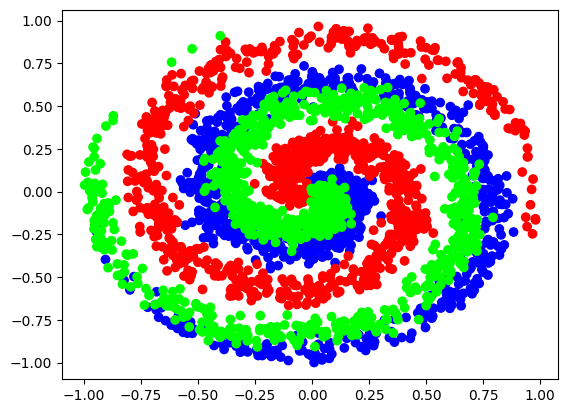

In [ ]:
import matplotlib.pyplot as plt
X, y = spiral_data(samples=1000, classes=3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='brg')
plt.show()

In [ ]:
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons, weight_regularizer_l1=0, weight_regularizer_l2=0, bias_regularizer_l1=0, bias_regularizer_l2=0):

        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

        #Adding regulization
        self.weight_regularizer_l1 = weight_regularizer_l1
        self.weight_regularizer_l2 = weight_regularizer_l2
        self.bias_regularizer_l1 = bias_regularizer_l1
        self.bias_regularizer_l2 = bias_regularizer_l2

    def forward(self, inputs):
        self.inputs = inputs
        self.output = np.dot(inputs, self.weights) + self.biases

    def backward(self, dvalues):
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)

        # Gradients on regularization
        # L1
        if self.weight_regularizer_l1 > 0:
            dL1 = np.ones_like(self.weights)
            dL1[self.weights < 0] = -1
            self.dweights += self.weight_regularizer_l1*dL1
        if self.bias_regularizer_l1 > 0:
            dL1 = np.ones_like(self.biases)
            dL1[self.biases < 0] = -1
            self.dbiases += self.bias_regularizer_l1*dL1

        # L2
        if self.weight_regularizer_l2 > 0:
            self.dweights += 2*self.weight_regularizer_l2*self.weights
        if self.bias_regularizer_l2 > 0:
            self.dbiases += 2*self.bias_regularizer_l2*self.biases



        self.dinputs = np.dot(dvalues, self.weights.T)


In [ ]:
class Activation_ReLU:
    def forward(self, inputs):
        self.inputs = inputs
        self.output = np.maximum(0, inputs)

    def backward(self, dvalues):
        self.dinputs = dvalues.copy() #so that original don't get modified
        self.dinputs[self.inputs <= 0] = 0 # equals zero if input(z) <= 0 else dL/dz because RELU returns input as it is if > 0


In [ ]:
class Activation_SoftMax:
  def forward(self, input):
    exp_values=np.exp(input - np.max(input, axis=1, keepdims=True))
    norm_values=exp_values/np.sum(exp_values, axis=1, keepdims=True)
    self.output=norm_values

In [ ]:
class Loss:
  def regularization_loss(self, layer):
        regularization_loss = 0

        # L1
        if layer.weight_regularizer_l1 > 0:
            regularization_loss += layer.weight_regularizer_l1*np.sum(np.abs(layer.weights))
        if layer.bias_regularizer_l1 > 0:
            regularization_loss += layer.bias_regularizer_l1*np.sum(np.abs(layer.biases))

        # L2
        if layer.weight_regularizer_l2 > 0:
            regularization_loss += layer.weight_regularizer_l2*np.sum(layer.weights*layer.weights)
        if layer.bias_regularizer_l2 > 0:
            regularization_loss += layer.bias_regularizer_l2*np.sum(layer.biases*layer.biases)

        return regularization_loss

  def calculate(self, output, y):
    sample_losses = self.forward(output, y) #function which gives loss (categorical cross entropy), -log(y_confi)
    data_loss =  np.mean(sample_losses)
    return data_loss


#-------------------------------------------------- LCCE --------------------------------------------------

class Loss_CategoricalCrossEntropy(Loss):
  def forward(self, y_pred, y_true):
    samples = len(y_pred)
    y_pred_clipped = np.clip(y_pred, 1e-7, 1-1e-7)

    if len(y_true.shape) == 1:
      # [0, 1, 1]      if given indexes
      correct_confidences = y_pred_clipped[range(samples), y_true]
    elif len(y_true.shape) == 2:
      # [[1,0,0],[0,1,0],[0,1,0]]    if given hot one encoded matrix
      correct_confidences = np.sum(y_pred_clipped*y_true, axis=1)

    negative_log_likelihoods = -np.log(correct_confidences)
    return negative_log_likelihoods


    def backward(self, dvalues, y_true):
        samples = len(dvalues)
        labels = len(dvalues[0])


        if len(y_true.shape) == 1:
            y_true = np.eye(labels)[y_true] # hot one encoding

        self.dinputs = -y_true / dvalues
        self.dinputs = self.dinputs/samples

In [ ]:
class Activation_Softmax_Loss_CategoricalCrossentropy:
    def __init__(self):
        self.activation = Activation_SoftMax()
        self.loss = Loss_CategoricalCrossEntropy()

    def forward(self, inputs, y_true):
        self.activation.forward(inputs)
        self.output = self.activation.output # gives output
        return self.loss.calculate(self.output, y_true) # already explained in Activation_Softmax, gives LOSS

    def backward(self, y_pred, y_true):
        samples = len(y_pred)
        if len(y_true.shape) == 2:
            y_true = np.argmax(y_true, axis=1) #converting to 0 based indexing again
        self.dinputs = y_pred.copy() # ASSIGINING y_pred to input
        self.dinputs[range(samples), y_true] -= 1  # derivative = y_pred - y_true = y_pred - 1 (for correct class)
        self.dinputs = self.dinputs/samples  # normalized

In [ ]:
import numpy as np

class Optimizer_Adam:
    def __init__(self, learning_rate=0.001, decay=0., epsilon=1e-7, beta_1=0.9, beta_2=0.999):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.epsilon = epsilon
        self.beta_1 = beta_1 #For momentum
        self.beta_2 = beta_2 #For cache term

    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * (1./(1.+self.decay * self.iterations))

    def update_params(self, layer):
        if not hasattr(layer, 'weight_cache'):
            layer.weight_momentums = np.zeros_like(layer.weights)
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_momentums = np.zeros_like(layer.biases)
            layer.bias_cache = np.zeros_like(layer.biases)


        layer.weight_momentums = self.beta_1 * layer.weight_momentums + (1 - self.beta_1) * layer.dweights
        layer.bias_momentums = self.beta_1 * layer.bias_momentums + (1 - self.beta_1) * layer.dbiases

        weight_momentums_corrected = layer.weight_momentums / (1 - self.beta_1 ** (self.iterations + 1))
        bias_momentums_corrected = layer.bias_momentums / (1 - self.beta_1 ** (self.iterations + 1))

        layer.weight_cache = self.beta_2 * layer.weight_cache + (1 - self.beta_2) * layer.dweights**2
        layer.bias_cache = self.beta_2 * layer.bias_cache + (1 - self.beta_2) * layer.dbiases**2

        weight_cache_corrected = layer.weight_cache / (1 - self.beta_2 ** (self.iterations + 1))
        bias_cache_corrected = layer.bias_cache / (1 - self.beta_2 ** (self.iterations + 1))

        layer.weights += -self.current_learning_rate * weight_momentums_corrected / (np.sqrt(weight_cache_corrected) + self.epsilon)
        layer.biases += -self.current_learning_rate * bias_momentums_corrected / (np.sqrt(bias_cache_corrected) + self.epsilon)

    def post_update_params(self):
        self.iterations += 1


In [ ]:
X, y = spiral_data(samples=1000, classes=3)

dense1 = Layer_Dense(2, 64, weight_regularizer_l2=5e-4, bias_regularizer_l2=5e-4)
activation1 = Activation_ReLU()
dense2 = Layer_Dense(64, 3)

loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()

optimizer = Optimizer_Adam(learning_rate=0.05, decay=5e-5)


for epoch in range(10001):
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    data_loss = loss_activation.forward(dense2.output, y)


    regularization_loss = loss_activation.loss.regularization_loss(dense1) + loss_activation.loss.regularization_loss(dense2)

    # total loss
    loss = data_loss + regularization_loss

    predictions = np.argmax(loss_activation.output, axis=1)
    if len(y.shape) == 2:
        y = np.argmax(y, axis=1)
    accuracy = np.mean(predictions == y)

    if not epoch % 1000:
        print(f'epoch: {epoch}, acc: {accuracy:.3f}, loss: {loss:.3f} (data_loss: {data_loss:.3f}, reg_loss: {regularization_loss:.3f}), lr: {optimizer.current_learning_rate}')


    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    #optimizing
    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()




epoch: 0, acc: 0.328, loss: 1.099 (data_loss: 1.099, reg_loss: 0.000), lr: 0.05
epoch: 1000, acc: 0.811, loss: 0.569 (data_loss: 0.479, reg_loss: 0.090), lr: 0.04762131530072861
epoch: 2000, acc: 0.890, loss: 0.387 (data_loss: 0.303, reg_loss: 0.083), lr: 0.045456611664166556
epoch: 3000, acc: 0.891, loss: 0.355 (data_loss: 0.287, reg_loss: 0.069), lr: 0.043480151310926564
epoch: 4000, acc: 0.893, loss: 0.349 (data_loss: 0.281, reg_loss: 0.068), lr: 0.04166840285011875
epoch: 5000, acc: 0.894, loss: 0.334 (data_loss: 0.275, reg_loss: 0.058), lr: 0.04000160006400256
epoch: 6000, acc: 0.900, loss: 0.315 (data_loss: 0.261, reg_loss: 0.054), lr: 0.03846301780837725
epoch: 7000, acc: 0.901, loss: 0.333 (data_loss: 0.278, reg_loss: 0.054), lr: 0.03703840882995667
epoch: 8000, acc: 0.899, loss: 0.324 (data_loss: 0.273, reg_loss: 0.050), lr: 0.03571556127004536
epoch: 9000, acc: 0.904, loss: 0.311 (data_loss: 0.264, reg_loss: 0.047), lr: 0.034483947722335255
epoch: 10000, acc: 0.898, loss: 0.3

In [ ]:
import numpy as np

class Layer_Dropout:
    def __init__(self, rate):
        self.rate = 1 - rate

    def forward(self, inputs):
        self.inputs = inputs

        self.binary_mask = np.random.binomial(1, self.rate, size=inputs.shape)/self.rate
        self.output = inputs*self.binary_mask

    def backward(self, dvalues):
        self.dinputs = dvalues*self.binary_mask

In [ ]:
X, y = spiral_data(samples=1000, classes=3)
dense1 = Layer_Dense(2, 64, weight_regularizer_l2=5e-4, bias_regularizer_l2=5e-4)
activation1 = Activation_ReLU()

dropout1 = Layer_Dropout(0.1)
dense2 = Layer_Dense(64, 3)

loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()

optimizer = Optimizer_Adam(learning_rate=0.05, decay=5e-5)

for epoch in range(10001):

    dense1.forward(X)
    activation1.forward(dense1.output)
    dropout1.forward(activation1.output)
    dense2.forward(dropout1.output)
    data_loss = loss_activation.forward(dense2.output, y)

    regularization_loss = loss_activation.loss.regularization_loss(dense1) + loss_activation.loss.regularization_loss(dense2)

    loss = data_loss + regularization_loss

    predictions = np.argmax(loss_activation.output, axis=1)
    if len(y.shape) == 2:
        y = np.argmax(y, axis=1)
    accuracy = np.mean(predictions == y)

    if not epoch % 100:
        print(f'epoch: {epoch}, acc: {accuracy:.3f}, loss: {loss:.3f} (data_loss: {data_loss:.3f}, reg_loss: {regularization_loss:.3f}), lr: {optimizer.current_learning_rate}')

    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    dropout1.backward(dense2.dinputs)
    activation1.backward(dropout1.dinputs)
    dense1.backward(activation1.dinputs)

    # optimizing
    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()



#testing on validation
X_test, y_test = spiral_data(samples=100, classes=3)
dense1.forward(X_test)
activation1.forward(dense1.output)
dense2.forward(activation1.output)
loss = loss_activation.forward(dense2.output, y_test)

predictions = np.argmax(loss_activation.output, axis=1)
if len(y_test.shape) == 2:
    y_test = np.argmax(y_test, axis=1)
accuracy = np.mean(predictions == y_test)

print(f'validation, acc: {accuracy:.3f}, loss: {loss:.3f}')

epoch: 0, acc: 0.368, loss: 1.099 (data_loss: 1.099, reg_loss: 0.000), lr: 0.05
epoch: 100, acc: 0.570, loss: 0.871 (data_loss: 0.837, reg_loss: 0.034), lr: 0.04975371909050202
epoch: 200, acc: 0.631, loss: 0.830 (data_loss: 0.789, reg_loss: 0.041), lr: 0.049507401356502806
epoch: 300, acc: 0.642, loss: 0.796 (data_loss: 0.755, reg_loss: 0.041), lr: 0.0492635105177595
epoch: 400, acc: 0.642, loss: 0.764 (data_loss: 0.724, reg_loss: 0.040), lr: 0.04902201088288642
epoch: 500, acc: 0.665, loss: 0.754 (data_loss: 0.715, reg_loss: 0.039), lr: 0.048782867456949125
epoch: 600, acc: 0.666, loss: 0.749 (data_loss: 0.710, reg_loss: 0.038), lr: 0.04854604592455945
epoch: 700, acc: 0.683, loss: 0.740 (data_loss: 0.703, reg_loss: 0.037), lr: 0.048311512633460556
epoch: 800, acc: 0.668, loss: 0.740 (data_loss: 0.704, reg_loss: 0.037), lr: 0.04807923457858551
epoch: 900, acc: 0.683, loss: 0.725 (data_loss: 0.689, reg_loss: 0.036), lr: 0.04784917938657352
epoch: 1000, acc: 0.682, loss: 0.726 (data_lo

# INCREASING HIDDEN LAYERS TO 2

In [ ]:
X, y = spiral_data(samples=1000, classes=3)

dense1 = Layer_Dense(2, 64, weight_regularizer_l2=5e-4, bias_regularizer_l2=5e-4)
activation1 = Activation_ReLU()
dense2 = Layer_Dense(64, 8, weight_regularizer_l2=5e-4, bias_regularizer_l2=5e-4)
activation2 = Activation_ReLU()
dense3 = Layer_Dense(8, 3)

loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()

optimizer = Optimizer_Adam(learning_rate=0.05, decay=5e-5)


for epoch in range(10001):
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)
    dense3.forward(activation2.output)
    data_loss = loss_activation.forward(dense3.output, y)


    regularization_loss = loss_activation.loss.regularization_loss(dense1) + loss_activation.loss.regularization_loss(dense2)+loss_activation.loss.regularization_loss(dense3)

    # total loss
    loss = data_loss + regularization_loss

    predictions = np.argmax(loss_activation.output, axis=1)
    if len(y.shape) == 2:
        y = np.argmax(y, axis=1)
    accuracy = np.mean(predictions == y)

    if not epoch % 1000:
      print(f'epoch: {epoch}, acc: {accuracy:.3f}, loss: {loss:.3f} (data_loss: {data_loss:.3f}, reg_loss: {regularization_loss:.3f}), lr: {optimizer.current_learning_rate}')



    loss_activation.backward(loss_activation.output, y)
    dense3.backward(loss_activation.dinputs)
    activation2.backward(dense3.dinputs)
    dense2.backward(activation2.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    #optimizing
    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.update_params(dense3)
    optimizer.post_update_params()





epoch: 0, acc: 0.314, loss: 1.099 (data_loss: 1.099, reg_loss: 0.000), lr: 0.05
epoch: 1000, acc: 0.915, loss: 0.314 (data_loss: 0.227, reg_loss: 0.087), lr: 0.04762131530072861
epoch: 2000, acc: 0.692, loss: 0.863 (data_loss: 0.716, reg_loss: 0.147), lr: 0.045456611664166556
epoch: 3000, acc: 0.916, loss: 0.285 (data_loss: 0.216, reg_loss: 0.069), lr: 0.043480151310926564
epoch: 4000, acc: 0.923, loss: 0.263 (data_loss: 0.207, reg_loss: 0.056), lr: 0.04166840285011875
epoch: 5000, acc: 0.920, loss: 0.252 (data_loss: 0.202, reg_loss: 0.049), lr: 0.04000160006400256
epoch: 6000, acc: 0.916, loss: 0.255 (data_loss: 0.211, reg_loss: 0.044), lr: 0.03846301780837725
epoch: 7000, acc: 0.910, loss: 0.254 (data_loss: 0.213, reg_loss: 0.041), lr: 0.03703840882995667
epoch: 8000, acc: 0.868, loss: 0.428 (data_loss: 0.345, reg_loss: 0.083), lr: 0.03571556127004536
epoch: 9000, acc: 0.880, loss: 0.390 (data_loss: 0.325, reg_loss: 0.064), lr: 0.034483947722335255
epoch: 10000, acc: 0.909, loss: 0.2

In [ ]:
X_test, y_test = spiral_data(samples=500, classes=3)
dense1.forward(X_test)
activation1.forward(dense1.output)
dense2.forward(activation1.output)
activation2.forward(dense2.output)
dense3.forward(activation2.output)
loss = loss_activation.forward(dense3.output, y_test)

# dense1.forward(X_test)
# activation1.forward(dense1.output)
# dense2.forward(activation1.output)
# loss = loss_activation.forward(dense2.output, y_test)

predictions = np.argmax(loss_activation.output, axis=1)
if len(y_test.shape) == 2:
    y_test = np.argmax(y_test, axis=1)
accuracy = np.mean(predictions == y_test)

print(f'validation, acc: {accuracy:.3f}, loss: {loss:.3f}')

validation, acc: 0.893, loss: 0.277


In [ ]:
X, y = spiral_data(samples=1000, classes=3)

dense1 = Layer_Dense(2, 64, weight_regularizer_l2=5e-4, bias_regularizer_l2=5e-4)
activation1 = Activation_ReLU()
dropout1 = Layer_Dropout(0.1)

dense2 = Layer_Dense(64, 32, weight_regularizer_l2=5e-4, bias_regularizer_l2=5e-4)
activation2 = Activation_ReLU()
dropout2 = Layer_Dropout(0.1)

dense3 = Layer_Dense(32, 3)


loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()

optimizer = Optimizer_Adam(learning_rate=0.05, decay=5e-5)

for epoch in range(10001):

    dense1.forward(X)
    activation1.forward(dense1.output)
    dropout1.forward(activation1.output)

    dense2.forward(dropout1.output)
    activation2.forward(dense2.output)
    dropout2.forward(activation2.output)

    dense3.forward(dropout2.output)
    data_loss = loss_activation.forward(dense3.output, y)

    #REGULARIZATION
    regularization_loss = (loss_activation.loss.regularization_loss(dense1) + loss_activation.loss.regularization_loss(dense2) + loss_activation.loss.regularization_loss(dense3))

    loss = data_loss + regularization_loss

    predictions = np.argmax(loss_activation.output, axis=1)
    if len(y.shape) == 2:
        y = np.argmax(y, axis=1)
    accuracy = np.mean(predictions == y)

    if not epoch % 100:
        print(f'epoch: {epoch}, acc: {accuracy:.3f}, loss: {loss:.3f} (data_loss: {data_loss:.3f}, reg_loss: {regularization_loss:.3f}), lr: {optimizer.current_learning_rate}')


    loss_activation.backward(loss_activation.output, y)
    dense3.backward(loss_activation.dinputs)

    dropout2.backward(dense3.dinputs)
    activation2.backward(dropout2.dinputs)
    dense2.backward(activation2.dinputs)

    dropout1.backward(dense2.dinputs)
    activation1.backward(dropout1.dinputs)
    dense1.backward(activation1.dinputs)


    # optimizing
    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.update_params(dense3)
    optimizer.post_update_params()


epoch: 0, acc: 0.347, loss: 1.099 (data_loss: 1.099, reg_loss: 0.000), lr: 0.05
epoch: 100, acc: 0.808, loss: 0.562 (data_loss: 0.469, reg_loss: 0.093), lr: 0.04975371909050202
epoch: 200, acc: 0.839, loss: 0.493 (data_loss: 0.403, reg_loss: 0.090), lr: 0.049507401356502806
epoch: 300, acc: 0.849, loss: 0.485 (data_loss: 0.395, reg_loss: 0.090), lr: 0.0492635105177595
epoch: 400, acc: 0.861, loss: 0.440 (data_loss: 0.352, reg_loss: 0.087), lr: 0.04902201088288642
epoch: 500, acc: 0.869, loss: 0.436 (data_loss: 0.352, reg_loss: 0.084), lr: 0.048782867456949125
epoch: 600, acc: 0.862, loss: 0.438 (data_loss: 0.353, reg_loss: 0.085), lr: 0.04854604592455945
epoch: 700, acc: 0.864, loss: 0.419 (data_loss: 0.336, reg_loss: 0.082), lr: 0.048311512633460556
epoch: 800, acc: 0.874, loss: 0.406 (data_loss: 0.328, reg_loss: 0.078), lr: 0.04807923457858551
epoch: 900, acc: 0.870, loss: 0.404 (data_loss: 0.327, reg_loss: 0.078), lr: 0.04784917938657352
epoch: 1000, acc: 0.880, loss: 0.393 (data_lo

# validation

In [ ]:
X_test, y_test = spiral_data(samples=100, classes=3)

dense1.forward(X_test)
activation1.forward(dense1.output)
dropout1.forward(activation1.output)

dense2.forward(dropout1.output)
activation2.forward(dense2.output)
dropout2.forward(activation2.output)

dense3.forward(dropout2.output)

loss = loss_activation.forward(dense3.output, y_test)

predictions = np.argmax(loss_activation.output, axis=1)
if len(y_test.shape) == 2:
    y_test = np.argmax(y_test, axis=1)
accuracy = np.mean(predictions == y_test)

print(f'validation, acc: {accuracy:.3f}, loss: {loss:.3f}')


validation, acc: 0.900, loss: 0.325


## Accuracy of 0.9

In [ ]:
class Layer_BatchNormalization:
    def __init__(self, n_features, momentum=0.9, epsilon=1e-5):
        self.gamma = np.ones((1, n_features))
        self.beta = np.zeros((1, n_features))
        self.momentum = momentum
        self.epsilon = epsilon

        self.running_mean = np.zeros((1, n_features))
        self.running_var = np.ones((1, n_features))

    def forward(self, inputs, training=True):
        self.inputs = inputs

        if training:
            self.mean = np.mean(inputs, axis=0, keepdims=True)
            self.var = np.var(inputs, axis=0, keepdims=True)
            self.std = np.sqrt(self.var + self.epsilon)

            self.normalized = (inputs - self.mean)/self.std
            self.output = self.gamma*self.normalized + self.beta

            self.running_mean = self.momentum*self.running_mean + (1 - self.momentum)*self.mean
            self.running_var = self.momentum*self.running_var + (1 - self.momentum)*self.var
        else:
            self.normalized = (inputs - self.running_mean)/np.sqrt(self.running_var + self.epsilon)
            self.output = self.gamma*self.normalized + self.beta

    def backward(self, dvalues):
        m = dvalues.shape[0]

        self.dgamma = np.sum(dvalues*self.normalized , axis=0, keepdims=True)
        self.dbeta = np.sum(dvalues, axis=0, keepdims=True)

        dnormalized = dvalues*self.gamma
        dvar = np.sum(dnormalized*(self.inputs - self.mean)*-0.5*self.std**-3 , axis=0, keepdims=True)
        dmean = np.sum(dnormalized* -1/self.std, axis=0, keepdims=True) + dvar*np.mean(-2*(self.inputs - self.mean) , axis=0, keepdims=True)

        self.dinputs = dnormalized/self.std + dvar*2*(self.inputs - self.mean)/m + dmean/m

    def update_params(self, optimizer):
        self.gamma += -optimizer.current_learning_rate * self.dgamma
        self.beta += -optimizer.current_learning_rate * self.dbeta


In [ ]:

import numpy as np

class Optimizer_Adam_BN:
    def __init__(self, learning_rate=0.001, decay=0., epsilon=1e-7, beta_1=0.9, beta_2=0.999):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.epsilon = epsilon
        self.beta_1 = beta_1 #For momentum
        self.beta_2 = beta_2 #For cache term

    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate*(1./(1.+self.decay*self.iterations))

    def update_params(self, layer):
    # Update weights and biases if they exist (Dense layer)
      if hasattr(layer, 'weights'):
          if not hasattr(layer, 'weight_cache'):
              layer.weight_momentums = np.zeros_like(layer.weights)
              layer.weight_cache = np.zeros_like(layer.weights)
              layer.bias_momentums = np.zeros_like(layer.biases)
              layer.bias_cache = np.zeros_like(layer.biases)

          layer.weight_momentums = self.beta_1*layer.weight_momentums + (1-self.beta_1)*layer.dweights
          weight_momentums_corrected = layer.weight_momentums/(1 - self.beta_1**(self.iterations + 1))

          layer.weight_cache = self.beta_2 * layer.weight_cache + (1-self.beta_2)*layer.dweights**2
          weight_cache_corrected = layer.weight_cache/(1 - self.beta_2**(self.iterations + 1))

          layer.weights += -self.current_learning_rate * weight_momentums_corrected/(np.sqrt(weight_cache_corrected) + self.epsilon)

          layer.bias_momentums = self.beta_1*layer.bias_momentums + (1 - self.beta_1)*layer.dbiases
          bias_momentums_corrected = layer.bias_momentums/(1 - self.beta_1**(self.iterations + 1))

          layer.bias_cache = self.beta_2*layer.bias_cache + (1 - self.beta_2)*layer.dbiases**2
          bias_cache_corrected = layer.bias_cache/(1 - self.beta_2**(self.iterations + 1))

          layer.biases += -self.current_learning_rate * bias_momentums_corrected/(np.sqrt(bias_cache_corrected) + self.epsilon)

      if hasattr(layer, 'gamma'):
          if not hasattr(layer, 'gamma_momentums'):
              layer.gamma_momentums = np.zeros_like(layer.gamma)
              layer.gamma_cache = np.zeros_like(layer.gamma)
              layer.beta_momentums = np.zeros_like(layer.beta)
              layer.beta_cache = np.zeros_like(layer.beta)

          layer.gamma_momentums = self.beta_1*layer.gamma_momentums + (1-self.beta_1)*layer.dgamma
          gamma_momentums_corrected = layer.gamma_momentums/(1 - self.beta_1**(self.iterations + 1))

          layer.gamma_cache = self.beta_2*layer.gamma_cache + (1 - self.beta_2)*layer.dgamma**2
          gamma_cache_corrected = layer.gamma_cache/(1 - self.beta_2**(self.iterations + 1))

          layer.gamma += -self.current_learning_rate * gamma_momentums_corrected/(np.sqrt(gamma_cache_corrected) + self.epsilon)

          layer.beta_momentums = self.beta_1*layer.beta_momentums + (1 - self.beta_1)*layer.dbeta
          beta_momentums_corrected = layer.beta_momentums/(1 - self.beta_1 *(self.iterations + 1))

          layer.beta_cache = self.beta_2*layer.beta_cache + (1 - self.beta_2)*layer.dbeta**2
          beta_cache_corrected = layer.beta_cache/(1 - self.beta_2 *(self.iterations + 1))

          layer.beta += -self.current_learning_rate * beta_momentums_corrected/(np.sqrt(beta_cache_corrected) + self.epsilon)



    def post_update_params(self):
        self.iterations += 1

# SPIRAL
difficult dataset

In [ ]:

def NN_3_layers(X, y, input=2, n1=64, n2=32, output=3):
  dense1 = Layer_Dense(input, n1, weight_regularizer_l2=5e-4, bias_regularizer_l2=5e-4)
  bn1 = Layer_BatchNormalization(n1)
  activation1 = Activation_ReLU()

  dense2 = Layer_Dense(n1, n2, weight_regularizer_l2=5e-4, bias_regularizer_l2=5e-4)
  bn2 = Layer_BatchNormalization(n2)
  activation2 = Activation_ReLU()

  dense3 = Layer_Dense(n2, output)



  loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()

  optimizer = Optimizer_Adam_BN(learning_rate=0.05, decay=5e-5)


  patience = 10
  min_delta = 1e-3
  accuracy_history = []

  for epoch in range(10001):

      dense1.forward(X)
      bn1.forward(dense1.output)
      activation1.forward(bn1.output)

      dense2.forward(activation1.output)
      bn2.forward(dense2.output)
      activation2.forward(bn2.output)

      dense3.forward(activation2.output)

      data_loss = loss_activation.forward(dense3.output, y)

      #REGULARIZATION
      regularization_loss = (loss_activation.loss.regularization_loss(dense1) + loss_activation.loss.regularization_loss(dense2) + loss_activation.loss.regularization_loss(dense3))

      loss = data_loss + regularization_loss

      predictions = np.argmax(loss_activation.output, axis=1)
      if len(y.shape) == 2:
          y = np.argmax(y, axis=1)
      accuracy = np.mean(predictions == y)


      accuracy_history.append(accuracy)
      if len(accuracy_history) > patience:
          accuracy_history.pop(0)
          acc_range = max(accuracy_history) - min(accuracy_history)
          if acc_range < min_delta:
              print(f"Early stopping at epoch {epoch} - accuracy change {acc_range:.5f} < min_delta {min_delta}")
              break



      if not epoch % 100:
          print(f'epoch: {epoch}, acc: {accuracy:.3f}, loss: {loss:.3f} (data_loss: {data_loss:.3f}, reg_loss: {regularization_loss:.3f}), lr: {optimizer.current_learning_rate}')


      loss_activation.backward(loss_activation.output, y)
      dense3.backward(loss_activation.dinputs)

      activation2.backward(dense3.dinputs)
      bn2.backward(activation2.dinputs)
      dense2.backward(bn2.dinputs)

      activation1.backward(dense2.dinputs)
      bn1.backward(activation1.dinputs)
      dense1.backward(bn1.dinputs)



      # optimizing
      optimizer.pre_update_params()
      optimizer.update_params(dense1)
      optimizer.update_params(dense2)
      optimizer.update_params(dense3)
      optimizer.update_params(bn1)
      optimizer.update_params(bn2)

      optimizer.post_update_params()

  return dense1, bn1, activation1, dense2, bn2, activation2, dense3, loss_activation


X, y = spiral_data(samples=1000, classes=3)
dense1, bn1, activation1, dense2, bn2, activation2, dense3, loss_activation = NN_3_layers(X, y)


epoch: 0, acc: 0.418, loss: 1.094 (data_loss: 1.094, reg_loss: 0.000), lr: 0.05
epoch: 100, acc: 0.901, loss: 0.284 (data_loss: 0.248, reg_loss: 0.036), lr: 0.04975371909050202
epoch: 200, acc: 0.900, loss: 0.275 (data_loss: 0.238, reg_loss: 0.037), lr: 0.049507401356502806
epoch: 300, acc: 0.883, loss: 0.453 (data_loss: 0.311, reg_loss: 0.142), lr: 0.0492635105177595
epoch: 400, acc: 0.893, loss: 0.311 (data_loss: 0.251, reg_loss: 0.061), lr: 0.04902201088288642
epoch: 500, acc: 0.900, loss: 0.271 (data_loss: 0.232, reg_loss: 0.038), lr: 0.048782867456949125
epoch: 600, acc: 0.908, loss: 0.273 (data_loss: 0.228, reg_loss: 0.045), lr: 0.04854604592455945
epoch: 700, acc: 0.909, loss: 0.247 (data_loss: 0.219, reg_loss: 0.028), lr: 0.048311512633460556
epoch: 800, acc: 0.884, loss: 0.351 (data_loss: 0.282, reg_loss: 0.069), lr: 0.04807923457858551
epoch: 900, acc: 0.909, loss: 0.253 (data_loss: 0.217, reg_loss: 0.036), lr: 0.04784917938657352
epoch: 1000, acc: 0.911, loss: 0.264 (data_lo

In [ ]:
X_val, y_val = spiral_data(samples=100, classes=3)

dense1.forward(X_val)
bn1.forward(dense1.output, training=False)
activation1.forward(bn1.output)

dense2.forward(activation1.output)
bn2.forward(dense2.output, training=False)
activation2.forward(bn2.output)

dense3.forward(activation2.output)

# Calculate loss and accuracy
loss = loss_activation.forward(dense3.output, y_val)

predictions = np.argmax(loss_activation.output, axis=1)
if len(y_val.shape) == 2:
    y_val = np.argmax(y_val, axis=1)
accuracy = np.mean(predictions == y_val)

print(f'Validation, acc: {accuracy:.3f}, loss: {loss:.3f}')


Validation, acc: 0.873, loss: 0.301


# MOON DATA
easy data

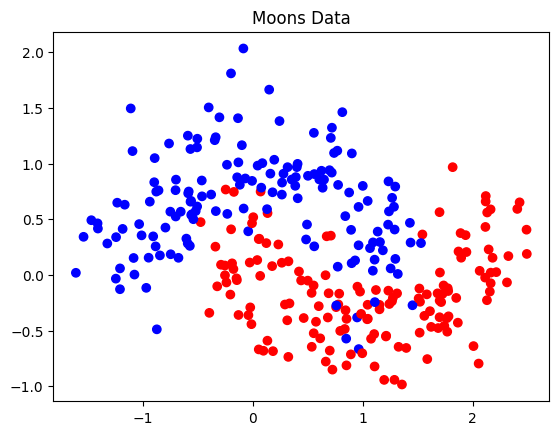

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=300, noise=0.28)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
plt.title("Moons Data")
plt.show()


In [ ]:

def NN_3_layers(X, y, input=2, n1=64, n2=32, output=3):
  dense1 = Layer_Dense(input, n1, weight_regularizer_l2=5e-4, bias_regularizer_l2=5e-4)
  bn1 = Layer_BatchNormalization(n1)
  activation1 = Activation_ReLU()

  dense2 = Layer_Dense(n1, n2, weight_regularizer_l2=5e-4, bias_regularizer_l2=5e-4)
  bn2 = Layer_BatchNormalization(n2)
  activation2 = Activation_ReLU()

  dense3 = Layer_Dense(n2, output)



  loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()

  optimizer = Optimizer_Adam_BN(learning_rate=0.05, decay=5e-5)


  patience = 10
  min_delta = 1e-3
  accuracy_history = []

  for epoch in range(10001):

      dense1.forward(X)
      bn1.forward(dense1.output)
      activation1.forward(bn1.output)

      dense2.forward(activation1.output)
      bn2.forward(dense2.output)
      activation2.forward(bn2.output)

      dense3.forward(activation2.output)

      data_loss = loss_activation.forward(dense3.output, y)

      #REGULARIZATION
      regularization_loss = (loss_activation.loss.regularization_loss(dense1) + loss_activation.loss.regularization_loss(dense2) + loss_activation.loss.regularization_loss(dense3))

      loss = data_loss + regularization_loss

      predictions = np.argmax(loss_activation.output, axis=1)
      if len(y.shape) == 2:
          y = np.argmax(y, axis=1)
      accuracy = np.mean(predictions == y)


      accuracy_history.append(accuracy)
      if len(accuracy_history) > patience:
          accuracy_history.pop(0)
          acc_range = max(accuracy_history) - min(accuracy_history)
          if acc_range < min_delta:
              print(f"Early stopping at epoch {epoch} - accuracy change {acc_range:.5f} < min_delta {min_delta}")
              break



      if not epoch % 100:
          print(f'epoch: {epoch}, acc: {accuracy:.3f}, loss: {loss:.3f} (data_loss: {data_loss:.3f}, reg_loss: {regularization_loss:.3f}), lr: {optimizer.current_learning_rate}')


      loss_activation.backward(loss_activation.output, y)
      dense3.backward(loss_activation.dinputs)

      activation2.backward(dense3.dinputs)
      bn2.backward(activation2.dinputs)
      dense2.backward(bn2.dinputs)

      activation1.backward(dense2.dinputs)
      bn1.backward(activation1.dinputs)
      dense1.backward(bn1.dinputs)



      # optimizing
      optimizer.pre_update_params()
      optimizer.update_params(dense1)
      optimizer.update_params(dense2)
      optimizer.update_params(dense3)
      optimizer.update_params(bn1)
      optimizer.update_params(bn2)

      optimizer.post_update_params()

  return dense1, bn1, activation1, dense2, bn2, activation2, dense3, loss_activation


X, y = make_moons(n_samples=300, noise=0.28)
dense1, bn1, activation1, dense2, bn2, activation2, dense3, loss_activation = NN_3_layers(X, y, output=2)


epoch: 0, acc: 0.303, loss: 0.705 (data_loss: 0.705, reg_loss: 0.000), lr: 0.05
epoch: 100, acc: 0.947, loss: 0.166 (data_loss: 0.144, reg_loss: 0.022), lr: 0.04975371909050202
epoch: 200, acc: 0.940, loss: 0.167 (data_loss: 0.143, reg_loss: 0.023), lr: 0.049507401356502806
epoch: 300, acc: 0.943, loss: 0.165 (data_loss: 0.145, reg_loss: 0.020), lr: 0.0492635105177595
epoch: 400, acc: 0.947, loss: 0.173 (data_loss: 0.141, reg_loss: 0.032), lr: 0.04902201088288642
epoch: 500, acc: 0.937, loss: 0.160 (data_loss: 0.138, reg_loss: 0.022), lr: 0.048782867456949125
epoch: 600, acc: 0.943, loss: 0.182 (data_loss: 0.142, reg_loss: 0.039), lr: 0.04854604592455945
epoch: 700, acc: 0.943, loss: 0.161 (data_loss: 0.133, reg_loss: 0.028), lr: 0.048311512633460556
epoch: 800, acc: 0.950, loss: 0.176 (data_loss: 0.159, reg_loss: 0.017), lr: 0.04807923457858551
epoch: 900, acc: 0.950, loss: 0.122 (data_loss: 0.100, reg_loss: 0.022), lr: 0.04784917938657352
Early stopping at epoch 981 - accuracy change

In [ ]:
X_val, y_val = make_moons(n_samples=1000, noise=0.28)

dense1.forward(X_val)
bn1.forward(dense1.output, training=False)
activation1.forward(bn1.output)

dense2.forward(activation1.output)
bn2.forward(dense2.output, training=False)
activation2.forward(bn2.output)

dense3.forward(activation2.output)

# Calculate loss and accuracy
loss = loss_activation.forward(dense3.output, y_val)

predictions = np.argmax(loss_activation.output, axis=1)
if len(y_val.shape) == 2:
    y_val = np.argmax(y_val, axis=1)
accuracy = np.mean(predictions == y_val)

print(f'Validation, acc: {accuracy:.3f}, loss: {loss:.3f}')


Validation, acc: 0.898, loss: 0.247
